In [11]:
import pandas as pd
from scipy import stats
from scipy.stats import t

## Introdução

Quando é necessário calcular um parâmetro desconhecido da população a partir de uma amostra, um erro considerável pode aparecer. Para evitar isso, podemos calcular um intervalo de valores possíveis para o parâmetro, assim como uma probabilidade atrelada de que o parâmetro real da população está dentro daquele intervalo. Um exemplo claro são as pesquisas eleitorais e as margens de erro, onde é dito que a pesquisa tem 95% de chance de sucesso. Ou seja, tem uma probabilidade de 95% do valor real estar dentro do intervalo de intenção de voto com as margens de erro, para mais e para menos.

O intervalo de confiança pode se apresentar de três formas:
- Intervalo de confiança para média
- Intervalo de confiança para proporção
- Intervalo de confiança para variância

### Intervalo de confiança para média

O intervalo de confiança para a média é o intervalo que busca enquadrar a média da população dentro de um certo intervalo. Esse intervalo tem uma variância de -x a +x e, quanto maior o valor de x, maior a garantia que a média da população estará dentro desse intervalo. Por exemplo:

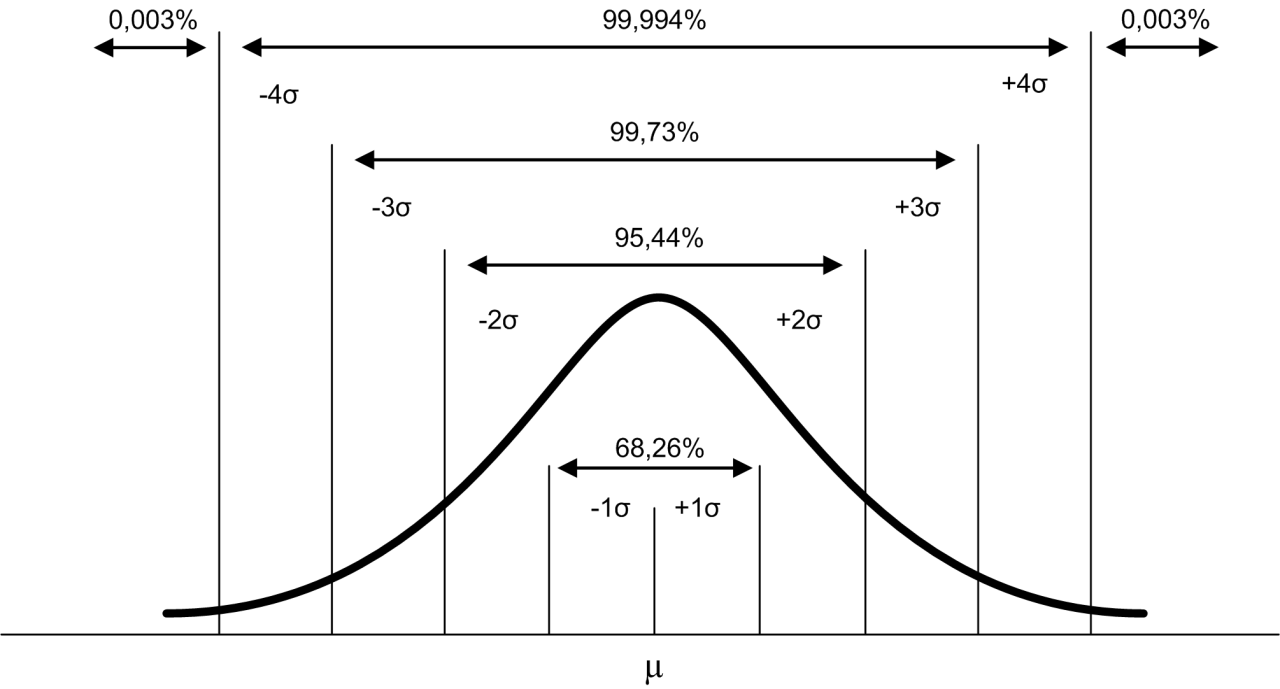

Esta imagem separa a divisão normal em 4 grandes intervalos, de modo que a probabilidade da média populacional estar dentro daquele intervalo aumenta a medida que o intervalo aumenta. Assim, o primeiro intervalo, que possui uma precisão maior (com um intervalo de somente 2 desvios padrões), possui uma chance de 68% de apresentar a média real da população como um todo. O segundo intervalo, com um delta maior (4 desvios padrões), possui uma probabilidade maior, de 95%, e assim por diante.

Desse modo, é possível interpretar os dados com mais segurança.

Podemos calcular o intervalo de confiança da seguinte forma:

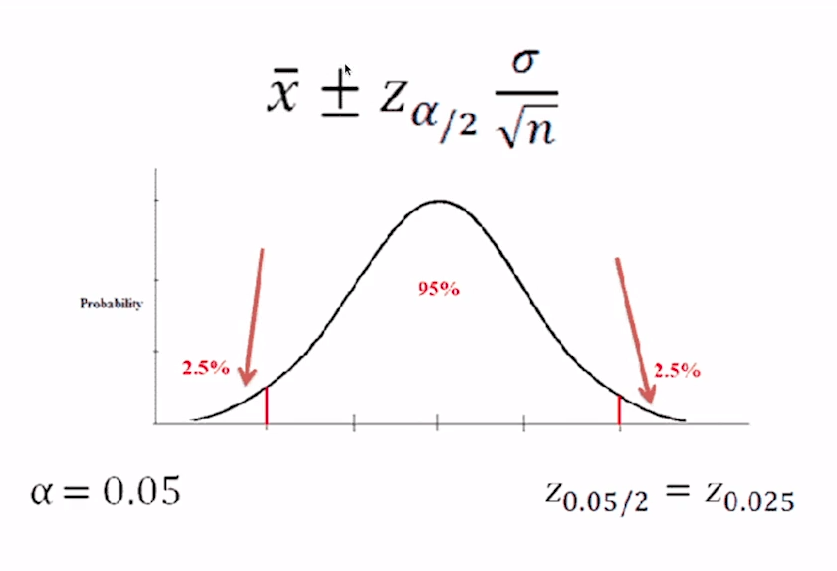

Onde:
- z = quantil da distribuição normal padrão
- alfa = 1 - nível de confiança (por exemplo, se eu desejo uma confiança de 0.95, o alfa será 0.05)

Com isso é possível calcular onde exatamente estarão os dados extremos que podem ser desconsiderados para a análise.

Na expressão acima, o termo da equação que vai à direita é o termo que se refere à margem de erro. Essa margem é maior quanto maior (ou menos bem determinada) for a amostra da população. Num caso de uma amostra muito grande, pelo Teorema do limite central, a média dos dados da amostra se aproxima o bastante dos dados da população. Portanto, por pensamento inverso, quanto menor for a população, maior a margem de erro. Graficamente podemos ver da seguinte forma:

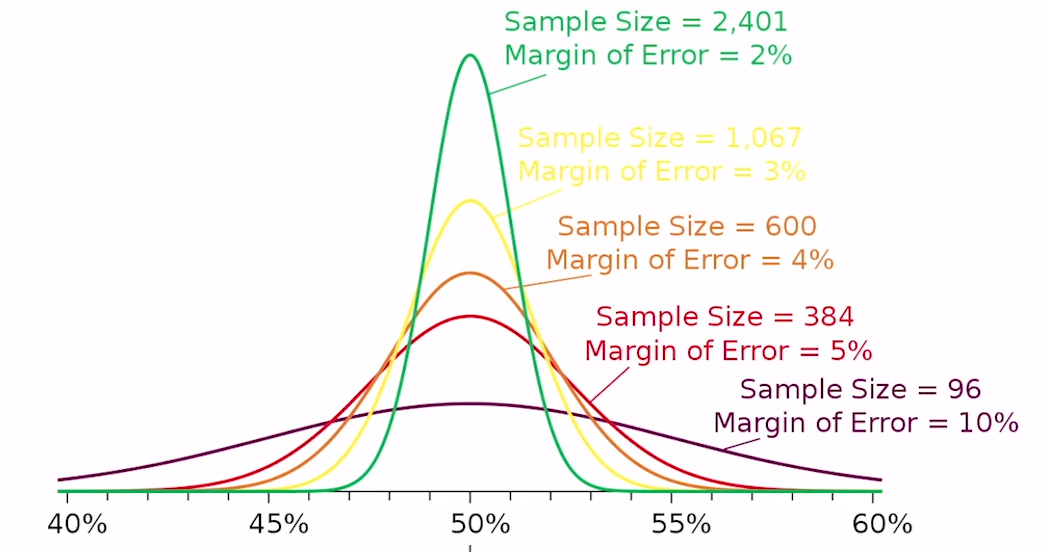

Supondo um intervalo de confiança de 95%, podemos entender esse gráfico da seguinte forma: todas as curvas possuem o mesmo valor de média, porém, como as curvas mais baixas são mais "abertas", é necessário um intervalo maior de dados para comportar as 95% das incidências necessárias pelo intervalo de confiança. Com isso, a margem de erro é maior. Por outro lado, a curva mais alta apresenta um pico bastante expressivo e, portanto, para manter os 95% dos dados necessários, a margem de erro precisa ser bem menor.

In [2]:
dados = pd.read_csv('BigmacPriceJulho2022.csv')

big_mac_media = dados['dollar_price'].mean()
big_mac_std = dados['dollar_price'].std()

print("Média do preço:", big_mac_media, "\nMediana do preço:", big_mac_std)

Média do preço: 4.003571428571429 
Mediana do preço: 1.3532130692415167


In [3]:
big_mac_95 = stats.norm.interval(0.95,
                                 loc = big_mac_media,
                                 scale = big_mac_std)

print("Intervalo de 95% de confiança para média:", big_mac_95)

Intervalo de 95% de confiança para média: (1.3513225494491499, 6.655820307693708)


In [6]:
margem_de_erro = big_mac_95[1] - big_mac_media
print("A margem de erro para esses dados é de {}%".format(round(margem_de_erro, 2)))

A margem de erro para esses dados é de 2.65%


### Intervalo de confiança para proporção

O intervalo de confiança para proporção é similar ao intervalo de confiança para média. Neste caso, precisamos garantir que uma determinada proporção, dentro da amostra, seja igual a proporção da população com uma margem de erro de X%.

O aumento no tamanho da amostra, pelo teorema do limite central, aproxima todos os parâmetros da amostra dos parâmetros da população. Portanto, se tomarmos o limite de n tendendo a p, sendo n o tamanho da amostra e p o tamanho da população, teremos que os parâmetros da amostra tendem ao parâmetros da população. Mas para valores menores de n, podemos ver alguns cálculos que podem ajudar:

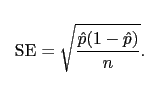

O intervalo de confiança é calculado tomando como parâmetro o valor da média da amostra e do tamanho da amostra.

In [9]:
def caro(preco):
    return int(preco > 4)

dados['caro'] = dados['dollar_price'].apply(caro)
dados.describe()

,local_price,dollar_ex,dollar_price,caro
count,70.000000,70.000000,70.000000,70.000000
mean,3793.318143,1042.428571,4.003571,0.428571
std,17915.281337,4462.135648,1.353213,0.498445
min,1.300000,1.000000,1.300000,0.000000
25%,4.662500,1.000000,3.000000,0.000000
50%,16.840000,4.000000,3.905000,0.000000
75%,93.500000,27.750000,4.687500,1.000000
max,130000.000000,25600.000000,7.100000,1.000000


In [10]:
big_mac_caro_prop = dados['caro'].mean()
big_mac_caro_prop_std = (big_mac_caro_prop * (1 - big_mac_caro_prop)) ** 0.5

print('Proporção de big macs caros: {}\nDesvio padrão: {}'.format(big_mac_caro_prop, big_mac_caro_prop_std))

Proporção de big macs caros: 0.42857142857142855
Desvio padrão: 0.49487165930539345


In [15]:
graus_de_liberdade = dados.shape[0] - 1
big_mac_95_prop = t.interval(0.95, 
                        df = graus_de_liberdade,
                        loc = big_mac_caro_prop,
                        scale = big_mac_caro_prop_std / (dados.shape[0] ** 0.5))

margem_de_erro_big_mac_prop = big_mac_95_prop[1] - big_mac_caro_prop

print('Intervalo de 95% de confiança para proporção: {}\nMargem de erro do intervalo: {}'.format(big_mac_95_prop, margem_de_erro_big_mac_prop))

Intervalo de 95% de confiança para proporção: (0.3105734465651951, 0.546569410577662)
Margem de erro do intervalo: 0.1179979820062334


### Aplicações

Vários usos corriqueiros do intervalo de confiança estão presentes no dia a dia.
- Pesquisas eleitorais que apontam um candidato com, digamos, 45% das intenções de voto com margem de erro de 2%, estão falando de um intervalo de confiança;
- Pesquisas meteorológicas que apontam uma incidência de chuva entre 10mm e 15mm estão trabalhando com intervalo de confiança;
- Prazo de validade de produtos e alimentos consideram uma margem de erro e, por determinação jurídica, apontam para o ponto com maior segurança possível para os usuários

Pode ser usada em testes A/B para calcular qual estratégia de marketing, por exemplo, é mais eficiente em retornar clientes ou receitas para a empresa. Uma vez que esses testes são feitos para uma amostra pequena da população, cálculos estatísticos são necessários para extrapolar essa informação para toda a população e permitir assim uma melhor tomada de decisão.

Importante notar que o intervalo de confiança aliado a outras métricas permite um cálculo muito mais realista do que simplesmente a média ou a mediana dos dados. Por vezes as médias dos resultados de dois processos distintos são próximas, mas os resultados do processo A são melhores do que o B, levando assim a uma conclusão que o processo A é superior ao B. Isso pode não ser verdade se, ao considerarmos os outros fatores (como o intervalo de confiança, por exemplo), vermos que a variação pode ser explicada por diversos outros fatores, como uma amostragem enviesada, muito pequena ou desbalanceada. Portanto, esses outros parãmetros permitem ir além do óbvio e nos entregar informações mais importantes e mais concretas.